In [20]:
from collections import Counter
from matplotlib import pyplot as plt
import math

num_friends = [100, 49, 45, 86, 23, 67, 90, 872, 53, 729, 54, 122, 98, 17, 62, 73, 972, 100, 49, 49, 49,67, 45,68, 34,34]
daily_minutes = [2*x for x in num_friends]

print(num_friends)
print(daily_minutes)

# Describing a single ste of data:
# Create a simple hstogram: 
# Counter: counts the occurrences of the elements of the LIST ==> Essentially generates a hash
friends_counts = Counter(num_friends)
# 49: 4
# 100: 2
# 45: 2

print(friends_counts)

[100, 49, 45, 86, 23, 67, 90, 872, 53, 729, 54, 122, 98, 17, 62, 73, 972, 100, 49, 49, 49, 67, 45, 68, 34, 34]
[200, 98, 90, 172, 46, 134, 180, 1744, 106, 1458, 108, 244, 196, 34, 124, 146, 1944, 200, 98, 98, 98, 134, 90, 136, 68, 68]
Counter({49: 4, 67: 2, 100: 2, 45: 2, 34: 2, 68: 1, 98: 1, 54: 1, 17: 1, 872: 1, 73: 1, 972: 1, 53: 1, 86: 1, 23: 1, 729: 1, 90: 1, 122: 1, 62: 1})


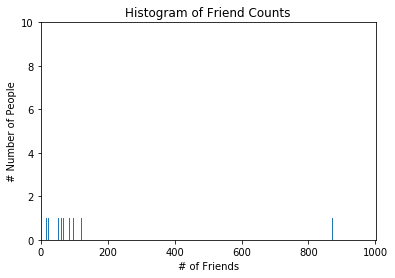

In [21]:
xs = range(1001)
# Y-axis is the count received above using count for each elemt in original list
ys = [friends_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,1001,0,10])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of Friends")
plt.ylabel("# Number of People")
plt.show()

In [22]:
# Statistics:

# Number of data points: Size of the data set
num_points = len(num_friends)

# Range (Min Max values)
min_value = min(num_friends)
max_value = max(num_friends)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest = sorted_values[1]
second_largest_value = sorted_values[-2]

In [23]:
# Reviewing Central Tendencies:

def mean(x):

    return sum(x)/len(x)

avg_num_friends = mean(num_friends)

print(avg_num_friends)

154


In [24]:
# median: more resistant to values causing shifts in central tendancy

def median(v):
    
    n = len(v)
    
    sorted_v = sorted(v)
    
    midpoint = n // 2
    
    # Even
    if n % 2 == 0:
        low_index = midpoint - 1
        high_index = midpoint
        
        return (sorted_v[low_index] + sorted_v[high_index]) / 2
    
    else:
        return sorted_v[midpoint]
    
median_num_friends = median(num_friends)

print(median_num_friends)

64


In [25]:
# Quantile: Generalization of the median which represnts the value less than which a certain percentile
# of the data lies:

# Median = 50% of data

def quantile(x, p):
    """Returns the pth percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.50))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

34
49
67
98
729


In [26]:
# Mode: the most common value
# Create counter using list which genertaes a hash (key: element in x => value: num times key appears in list)
def mode(x):
    
    counts = Counter(x)
    max_count = max(counts.values())
    
    # Do not need enumerate here since working on Counter (hash)
    return [key for key, value in counts.iteritems() if value == max_count]


num_friends_mode = mode(num_friends)

print(num_friends_mode)

[49]


In [27]:
#Dispersion: measure of how spread out the data is
# Value near 0 then not very spread out

# Range: Diff between max and min list values
def data_range(x):
    
    return max(x) - min(x)

# More complex measure of dispersion is variance

def de_mean(x):
    
    # Sum values in x
    x_mean = mean(x)
    
    return [x_i - x_mean for x_i in x]

# dot product: sum of component products measures how far the vector v extends in the w direction
# length of the vector you would get if you projected v onto w
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v,w)) 

def sum_of_squares(v):
    
    return dot(v,v)

def variance(x):
    
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

# Define the median range of values:
def standard_deviation(x):
    return math.sqrt(variance(x))

# More robust approach computes the diff between 75th percentile and 25% percentile
# to avoid outliers:

def interquartile_range(x):
    
    return quantile(x, 0.75) - quantile(x, 0.25)



In [28]:
# Correlation: describing association between variables

# a. Covariance/Sample Variance: measures how 2 variables vary in tandem
def covariance(x, y):
    
    n = len(x)
    # dot product: sums the products of corresponding pairs of elements
    # Wehn x, y elements are both either above or below their means they have a postive covariance (more highly correlated)
    # When x, y differ then a negative covariance is produced (less correlated)
    # Large positive covariance: both x,y are either large or samll in unison
    # Large Negative covariance: x,y values differ in the extremes from one another
    return dot(de_mean(x), de_mean(y)) / (n-1)

friend_time_cov = covariance(num_friends, daily_minutes)
    
print(friend_time_cov)

# Sample Standard Deviation p.63:
# removes squared and allows value to be expressed in the original units of measurement:
friend_time_stand_dev = standard_deviation(friend_time_cov)

# Divides out the standard deviations of both variables
# Leades to a vlaue in range of -1 to 1
# 1: Perfect correlation
# -1: No correlation
def correlation(x, y):
    
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0
    

friend_time_corr = correlation(num_friends, daily_minutes)
    
print(friend_time_corr)
    

137946
0.999998187702
